In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['MedianHouseholdIncome2015.csv', 'PercentagePeopleBelowPovertyLevel.csv', 'PercentOver25CompletedHighSchool.csv', 'PoliceKillingsUS.csv', 'ShareRaceByCity.csv']


In [80]:
percentage_people_below_powerty_level=pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv',encoding='Latin-1')
percentage_people_below_powerty_level=pd.DataFrame(percentage_people_below_powerty_level)

In [81]:
percentage_people_below_powerty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [82]:
percentage_people_below_powerty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [83]:
#percentage_people_below_powerty_level.poverty_rate.value_counts()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'matplotlib.pyplot' has no attribute 'ctick'

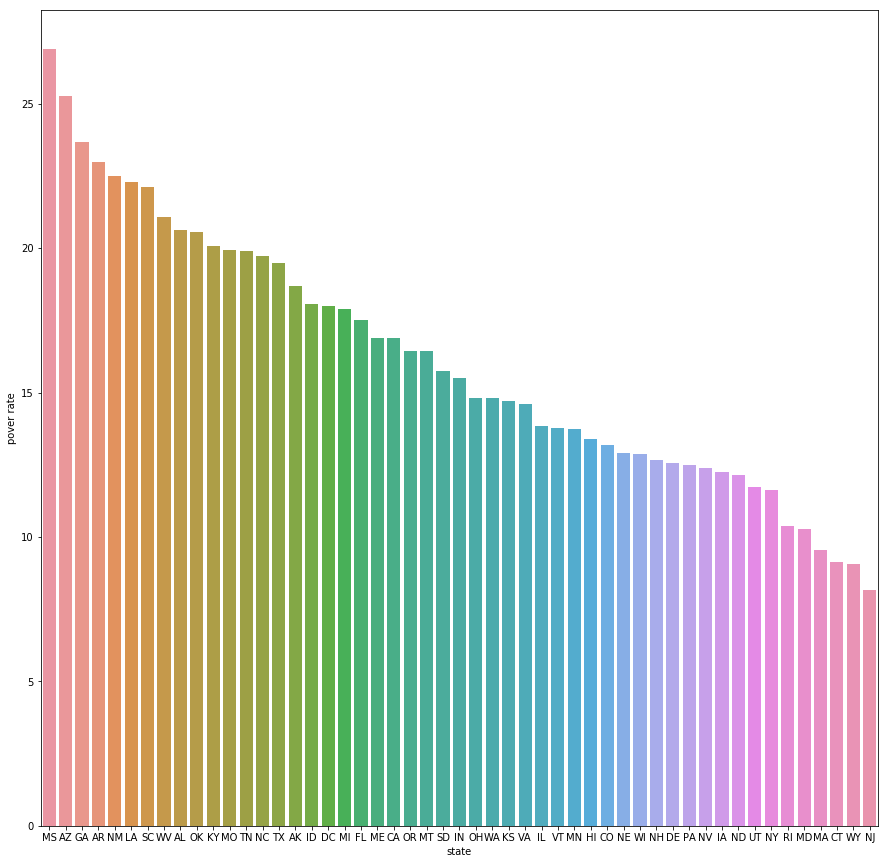

In [84]:
percentage_people_below_powerty_level.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_people_below_powerty_level.poverty_rate=percentage_people_below_powerty_level.poverty_rate.astype(float)
area_list=list(percentage_people_below_powerty_level['Geographic Area'])
area_poverty_ratio=[]
for i in area_list:
    x=percentage_people_below_powerty_level[percentage_people_below_powerty_level['Geographic Area']==i]
    area_poverty_rate=sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data=pd.DataFrame({'area_list':area_list,'area_poverty_ratio':area_poverty_ratio})
new_index=(data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data=data.reindex(new_index)

plt.figure(figsize=(15,15))
sns.barplot(x=sorted_data['area_list'],y=sorted_data['area_poverty_ratio'])
plt.xlabel('state')
plt.ylabel('pover rate')
plt.ctick(rotation=45)
plt.tittle('eyalete göre yoksulluk oranı')


In [85]:
share_race_bycity=pd.read_csv('../input/ShareRaceByCity.csv')

In [86]:
share_race_bycity.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [87]:
share_race_bycity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


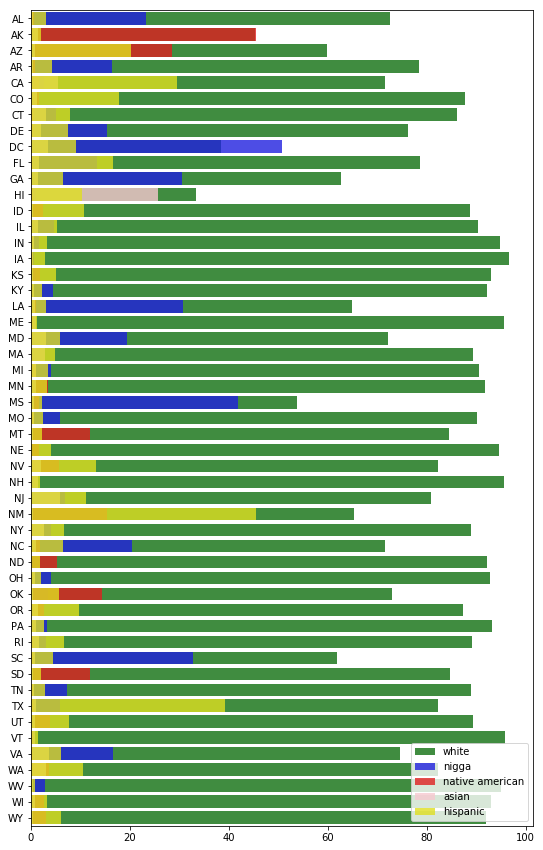

In [100]:
share_race_bycity.replace(['-'],0.0,inplace=True)
share_race_bycity.replace(['(X)'],0.0,inplace = True)
share_race_bycity.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_bycity.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list=list(share_race_bycity['Geographic area'])
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]
for i in area_list:
    x=share_race_bycity[share_race_bycity['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,alpha=0.8,color='green',label='white')
sns.barplot(x=share_black,y=area_list,alpha=0.8,color='blue',label='nigga')
sns.barplot(x=share_native_american,y=area_list,alpha=0.8,color='red',label='native american')
sns.barplot(x=share_asian,y=area_list,alpha=0.8,color='pink',label='asian')
sns.barplot(x=share_hispanic,y=area_list,alpha=0.8,color='yellow',label='hispanic')
ax.legend(loc='lower right',frameon = True)


